# Exercise 2 a)
 Import the libraries that we'll use

In [1]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random as random
random.seed(100)

Write all the functions that we'll need

In [2]:
def find(v, i): # function to find the positions of an element in a vector
    l = []
    pos = 0
    for x in v:
        if(x == i):
            l.append(pos)
        pos = pos + 1
    return l
def momment_of_degree_distribution(G,m):
    M = 0
    N = len(G)
    for i in G.nodes():
        M = M + G.degree(i)**m
    M = M/N
    return M

Here is the action

In [3]:
def main():
    # Arguments to create the network
    N = 30 #number of nodes
    av_degree = 8 # average degree
    p = float(av_degree)/float(N) #probability of connection in the ER model
    m = int(av_degree/2) # number of added nodes in the BA model
    kappa = av_degree # number of neighbors in the WS model
    networkSeed = 50


    # Create a list with the networks
    networks = []
    networks.append(nx.gnp_random_graph(N, p, seed=networkSeed, directed=False))
    networks[-1].name = 'ER'
    networks.append(nx.barabasi_albert_graph(N, m, seed=networkSeed))
    networks[-1].name = 'BA'
    networks.append(nx.watts_strogatz_graph(N, av_degree, 0.001, seed=networkSeed))
    networks[-1].name = 'WS0.001'
    networks.append(nx.watts_strogatz_graph(N, av_degree, 0.01, seed=networkSeed))
    networks[-1].name = 'WS0.01'
    networks.append(nx.watts_strogatz_graph(N, av_degree, 0.1, seed=networkSeed))
    networks[-1].name = 'WS0.1'

    plt.figure()
    for G in networks:
        mu = 1  # Probability of recover
        vlbda = list()
        rhoI = list() # vector that stores the fraction of infected nodes according to the parameter lambda
        for lbd in arange(0,1, 0.05):
            beta = lbd*mu
            #Reactive process: SIR dynamics
            Tmax = 20 #maximum number of steps
            av_rho = np.zeros(Tmax)
            for seed_node in G.nodes():
                vector_states = np.zeros(N) # vector that stores the states of the vertices
                vector_states[seed_node] = 1 # vector that stores the states
                ninfected = 1
                infected = list() # Stores the number of infected nodes at each time step
                vrho = list()
                # Reactive model
                for t in arange(0, Tmax): # Simulate until a maximum number of steps Tmax
                    infected = find(vector_states,1) # list of infected nodes
                    for i in infected: # try to infect the neighbors
                        neigs = G.neighbors(i)
                        for j in neigs:
                            if np.random.rand() < beta:
                                vector_states[j] = 1
                    for k in infected: # try to recover the infected nodes
                        if np.random.rand() < mu:
                            vector_states[k] = 0
                    ninfected = len(find(vector_states,1))
                    vrho.append(ninfected/N)
                for x in arange(0, len(vrho)):
                    av_rho[x] = av_rho[x] + vrho[x]
            av_rho = av_rho/len(G.nodes())
            rhoI.append(mean(av_rho[arange(int(0.8*Tmax), Tmax)]))
            vlbda.append(lbd)
            #print(lbd, mean(av_rho[arange(int(0.8*Tmax), Tmax)]))
        plt.plot(vlbda, rhoI, 'o-', label=G.name)
    plt.title('Comparison')
    plt.xlabel("lambda", fontsize=15)
    plt.ylabel("Fraction of infected nodes", fontsize=15)
    #lambda_c = momment_of_degree_distribution(G,1)/momment_of_degree_distribution(G,2)
    lambda_c = momment_of_degree_distribution(networks[0],1)/momment_of_degree_distribution(networks[0],2)
    plt.axvline(lambda_c, color = 'b', label='Theoretical lambda_c')
    plt.legend()
    plt.grid(True)
    plt.show(block=True)

Call main

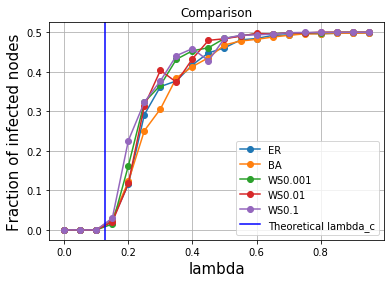

In [4]:
if __name__ == '__main__':
    main()

Analyzing the chart we can see that the curves are very similar. There is a small difference between BA network and the other networks, that it seems to be more resilient to infections in the SIR model that the other networks.